<a href="https://colab.research.google.com/github/niharnandan/Personal-Projects/blob/master/PYMC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-darkgrid')

Running on PyMC3 v3.5


In [0]:
dfSealevel = pd.read_csv('https://media.githubusercontent.com/media/MUSSLES/tutorials/master/data/GMSL_ChurchWhite2011_yr_2015.csv')
dfTemperature = pd.read_csv('https://media.githubusercontent.com/media/MUSSLES/tutorials/master/data/NOAA_IPCC_RCPtempsscenarios.csv')
year = dfSealevel["year"].tolist()
sealevel = dfSealevel["sealevel"].tolist()
sealevel_sigma = dfSealevel["uncertainty"].tolist()
temperatures = dfTemperature.loc[dfTemperature["Time"] <= 2013, "Historical NOAA temp & CNRM RCP 8.5 with respect to 20th century"]

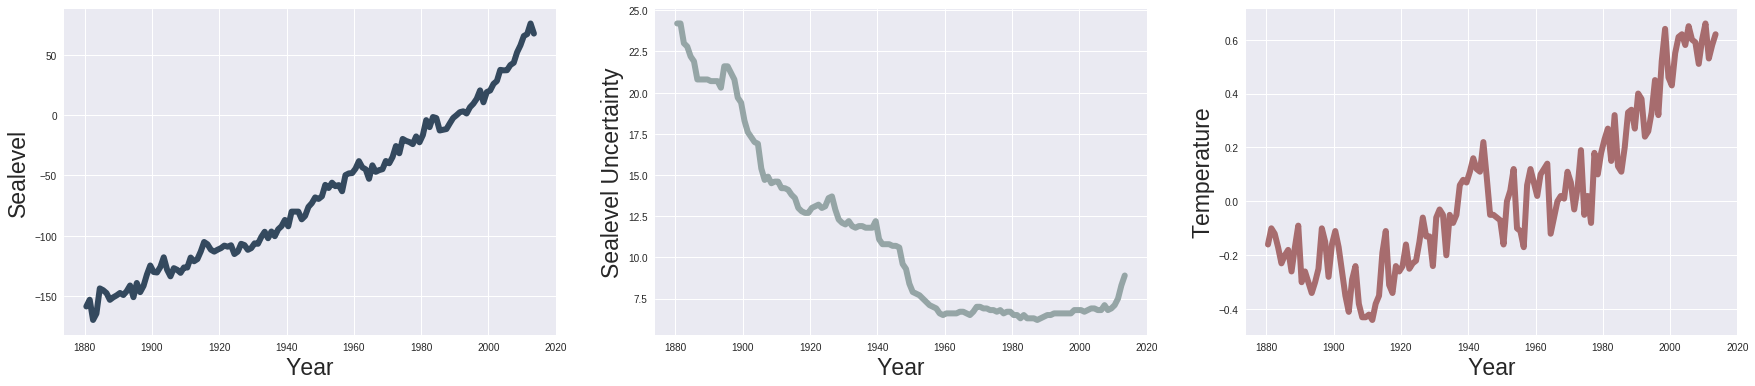

In [36]:
fig,ax = plt.subplots(nrows = 1, ncols = 3,figsize=(30,6))
ax[0].plot(year,sealevel,"#34495e",lw=6)
ax[1].plot(year,sealevel_sigma,"#95a5a6",lw=6)
ax[2].plot(year,temperatures,"#a76c6e",lw=6)
ax[0].set_ylabel('Sealevel', fontsize=23)
ax[1].set_ylabel('Sealevel Uncertainty', fontsize=23)
ax[2].set_ylabel('Temperature', fontsize=23)
for i in range(3): ax[i].set_xlabel('Year', fontsize=23)
plt.show()

In [0]:
def generate_level(paramaters, temperatures, deltat):
    alpha, Teq, S0 = parameters[0], parameters[1], parameters[2]
    S = [0]*(len(temperatures)+1)
    S[0] = S0
    for i in range(1,len(temperatures)+1):
        S[i] = S[i-1] + deltat * alpha * (temperatures[i-1] - Teq)
    return S[1:]

In [56]:
model = pm.Model()

with model:
    alpha = pm.Uniform('alpha', 0, 5)
    Teq = pm.Uniform('Teq', -1, 2)
    S_0 = pm.Uniform('S_0', -200, -100)
    parameters = [alpha, Teq, S_0]
    temp = generate_level(parameters, temperatures, 1)
    mu = temp
    sigma = 1.
    returns = pm.Normal('returns', mu=mu, sd=sigma, observed=sealevel)
    
    step = pm.Metropolis()
    trace = pm.sample(15000, step)
    
plt.hist(trace[2000:]['alpha'], label='PyMC3 sampler', bins=20, edgecolor = 'white');
plt.legend();

KeyboardInterrupt: ignored